#Part 1: Data Collection

In [ ]:
!pip install python-binance
!pip install pandas
!pip install tabulate

In [ ]:
import requests
import json
from datetime import datetime
from tabulate import tabulate
import pandas as pd

## 1a) News Articles (Jikang will do this by Sunday evening)

5 coins, daily, past month

In [ ]:
import requests
from requests_oauthlib import OAuth1
from bs4 import BeautifulSoup
import json
import pandas as pd

In [ ]:
def getSentiment(text):
    endpoint = "https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/3d4468af-8ad0-4453-9535-72f90c9eb5c4/v1/analyze"
    username = "apikey"
    password = "-OwF1ab-S1ekafX-ps_dSnaFE_Q0eYBf9wtTdcVV2x0B"

    parameters = {
        'features': 'emotion,sentiment',
        'version' : '2021-08-01',
        'text': text,
        'language' : 'en',
    }

    resp = requests.get(endpoint, params=parameters, auth=(username, password))

    return resp.json()['emotion']['document']['emotion']

In [ ]:
def getNews(coin):
    url = []
    date = []
    news_endpoint = 'https://newsapi.org/v2/everything?apiKey=0e8dbc7327f240e18b3aba583e9d98bd'
    my_params = {
        'q' : coin,
        'language' : 'en'
    }
    resp1 = requests.get(news_endpoint, params = my_params)
    my_data = resp1.json()
    for i in range(len(my_data['articles'])):
      url.append(my_data['articles'][i]['url'])
      date.append(my_data['articles'][i]['publishedAt'])

    articles_content = []
    for i in range(len(url)):
      full_article = ""
      resp2 = requests.get(url[i])
      soup = BeautifulSoup(resp2.text)
      for paragraph in soup.find_all('p'):
        if paragraph.string != None:
          full_article+=paragraph.text
      articles_content.append(str(full_article))
      
    my_dict = {'Date published' : [],
               'url' : [],
               'anger' : [],
                 'disgust' : [],
               'fear' : [],
               'joy' : [],
               'sadness': []}

    for i in range(len(articles_content)):
      try:
        text_emotion = getSentiment(articles_content[i])
        my_dict['Date published'].append(date[i])
        my_dict['url'].append(url[i])
        my_dict['anger'].append(text_emotion['anger'])
        my_dict['disgust'].append(text_emotion['disgust'])
        my_dict['fear'].append(text_emotion['fear'])
        my_dict['joy'].append(text_emotion['joy'])
        my_dict['sadness'].append(text_emotion['sadness'])
      except KeyError: 
        pass

    return my_dict
    


In [ ]:
df_btc = pd.DataFrame(getNews("bitcoin"))
df_btc

,Date published,url,anger,disgust,fear,joy,sadness
0,2021-11-05T13:32:14Z,https://www.theverge.com/2021/11/5/22765098/kr...,0.345120,0.038964,0.033635,0.112884,0.322276
1,2021-10-28T16:45:00Z,https://gizmodo.com/bitcoin-miners-are-gobblin...,0.058318,0.040424,0.086527,0.657391,0.458514
2,2021-10-26T18:10:00Z,https://gizmodo.com/roughly-one-third-of-bitco...,0.173820,0.029814,0.089930,0.436450,0.233139
3,2021-11-12T17:31:23Z,https://www.entrepreneur.com/article/396981,0.076649,0.062443,0.083310,0.489422,0.511176
4,2021-10-21T03:27:00Z,https://www.reuters.com/business/finance/bitco...,0.097000,0.045966,0.095532,0.662830,0.543957
5,2021-10-20T21:23:09Z,https://www.reuters.com/video/watch/idOVEZYY6Q3,0.000001,0.000000,0.001837,0.026355,0.001244
6,2021-11-08T16:07:45Z,https://www.entrepreneur.com/article/395938,0.084857,0.074154,0.015294,0.244203,0.212153
7,2021-11-17T07:00:46Z,https://amp.theguardian.com/sport/2021/nov/17/...,0.035014,0.006252,0.000874,0.478035,0.088670
8,2021-11-09T15:39:00Z,https://www.reuters.com/article/fintech-crypto...,0.151417,0.036440,0.104041,0.572135,0.234062
9,2021-11-16T10:26:00Z,https://www.reuters.com/business/finance/bitco...,0.123445,0.053035,0.110246,0.308889,0.592140


In [ ]:
df_eth = pd.DataFrame(getNews("eth"))
df_eth

,Date published,url,anger,disgust,fear,joy,sadness
0,2021-11-18T12:51:12Z,https://time.com/6121132/time-and-galaxy-digit...,0.102882,0.046546,0.057190,0.651402,0.457385
1,2021-10-29T05:24:00Z,https://www.reuters.com/technology/cryptocurre...,0.155521,0.038323,0.089924,0.533131,0.462914
2,2021-11-17T09:08:00Z,https://www.reuters.com/article/fintech-crypto...,0.150142,0.051618,0.128846,0.297227,0.448919
3,2021-11-03T16:55:53Z,https://www.theverge.com/2021/11/3/22761305/tu...,0.111811,0.096079,0.069832,0.616744,0.503888
4,2021-11-11T00:27:49Z,https://news.yahoo.com/u-inflation-hits-30-hig...,0.097417,0.096256,0.057071,0.599100,0.474080
5,2021-10-26T12:15:00Z,https://www.entrepreneur.com/article/389771,0.101331,0.047988,0.523290,0.615143,0.168922
6,2021-11-19T20:35:00Z,https://gizmodo.com/crypto-fueled-plan-to-buy-...,0.147454,0.435222,0.109816,0.534524,0.223362
7,2021-11-16T15:21:39Z,https://www.vice.com/en/article/k7w8az/investo...,0.513291,0.107543,0.153123,0.536163,0.586767
8,2021-11-08T06:00:00Z,https://www.archdaily.com/971457/the-canopy-sp...,0.078596,0.036556,0.105237,0.598647,0.149919
9,2021-10-25T13:30:22Z,https://pennystocks.com/featured/2021/10/25/re...,0.101638,0.101183,0.075813,0.256691,0.546074


In [ ]:
df_shib = pd.DataFrame(getNews('shib'))
df_shib

,Date published,url,anger,disgust,fear,joy,sadness
0,2021-11-04T14:15:00Z,https://www.entrepreneur.com/article/395359,0.065156,0.010988,0.085201,0.182600,0.530261
1,2021-10-27T14:36:00Z,https://www.entrepreneur.com/article/393669,0.066279,0.007148,0.038863,0.257765,0.374659
2,2021-10-28T14:50:00Z,https://www.entrepreneur.com/article/393962,0.092385,0.134712,0.044079,0.461666,0.206362
3,2021-11-02T14:45:00Z,https://www.entrepreneur.com/article/394810,0.104545,0.097897,0.030931,0.163662,0.555716
4,2021-10-28T12:30:00Z,https://www.reuters.com/business/finance/dogec...,0.175386,0.046791,0.081105,0.650753,0.160304
5,2021-10-26T18:14:02Z,https://news.yahoo.com/trump-stock-slumps-trad...,0.086011,0.083709,0.056410,0.588195,0.192622
6,2021-11-11T00:27:49Z,https://news.yahoo.com/u-inflation-hits-30-hig...,0.097417,0.096256,0.057071,0.599100,0.474080
7,2021-10-28T10:23:57Z,https://www.financemagnates.com/cryptocurrency...,0.161940,0.087963,0.134029,0.641886,0.174232
8,2021-10-28T20:47:09Z,https://www.vice.com/en/article/7kbpb9/an-doll...,0.141211,0.153406,0.108075,0.261857,0.208656
9,2021-11-19T20:35:47Z,https://news.yahoo.com/adeles-30-includes-chri...,0.060344,0.105217,0.066801,0.714697,0.489177


In [ ]:
df_doge = pd.DataFrame(getNews('doge'))
df_doge

,Date published,url,anger,disgust,fear,joy,sadness
0,2021-11-16T20:26:06Z,https://www.entrepreneur.com/article/397578,0.090354,0.190799,0.090144,0.327829,0.169620
1,2021-10-28T14:50:00Z,https://www.entrepreneur.com/article/393962,0.092385,0.134712,0.044079,0.461666,0.206362
2,2021-11-17T14:05:41Z,https://amp.theguardian.com/technology/2021/no...,0.041398,0.010043,0.006005,0.039778,0.090409
3,2021-10-27T14:36:00Z,https://www.entrepreneur.com/article/393669,0.066279,0.007148,0.038863,0.257765,0.374659
4,2021-11-10T13:30:24Z,https://www.engadget.com/best-gadgets-for-pets...,0.027964,0.004054,0.001572,0.955219,0.013819
5,2021-11-04T14:15:00Z,https://www.entrepreneur.com/article/395359,0.065156,0.010988,0.085201,0.182600,0.530261
6,2021-11-19T04:28:00Z,https://www.reuters.com/article/fintech-crypto...,0.150000,0.057089,0.162154,0.234293,0.649523
7,2021-10-25T16:15:19Z,https://www.entrepreneur.com/article/393159,0.622933,0.079171,0.007174,0.239462,0.160426
8,2021-11-14T17:25:40Z,https://www.bbc.co.uk/sport/rugby-union/59283051,0.214386,0.139406,0.104063,0.584476,0.286560
9,2021-11-08T18:00:11Z,https://www.vice.com/en/article/4awdwn/elon-mu...,0.217797,0.181272,0.072777,0.189074,0.248965


##1b) Currency Prices

In [ ]:
def getAllBinanceSymbols():
    url = 'https://api.binance.com/api/v3/exchangeInfo'
    response = requests.get(url)
    symbols = []
    for asset in response.json()["symbols"]:
        # if "USD" in asset["symbol"] and "USDT" not in asset["symbol"]:
        symbols.append(asset["symbol"])
    # prettyPrint = json.dumps(response.json(), indent=4, sort_keys=True)
    return list(set(symbols))

In [ ]:
validIntervals = ['1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M']

def searchBinance(symbols, startTime='2020-01-01 00:00:00', endTime='2020-12-02 00:00:00', interval='1M'):
    if interval not in validIntervals: 
        raise ValueError('Please enter a valid interval: ' + str(validIntervals))
    dfs = []
    url = 'https://api.binance.com/api/v3/klines'
    for symbol in symbols:
        try:
            params = {
                'symbol': symbol,
                'interval': interval,
                'limit': 100,
              'startTime': int(datetime.strptime(startTime, '%Y-%m-%d %H:%M:%S').timestamp() * 1000),
                'endTime': int(datetime.strptime(endTime, '%Y-%m-%d %H:%M:%S').timestamp() * 1000)
            }
            response = requests.get(url, params=params)
            df = pd.DataFrame(response.json())
            df.columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
            df['Coin Pair'] = symbol
            df['Open time'] = df['Open time'].apply(lambda x: datetime.fromtimestamp(x/1000.0))
            df['Close time'] = df['Close time'].apply(lambda x: datetime.fromtimestamp(x/1000.0))
            # dfs.append(df[['Coin Pair', 'Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time']])
            dfs.append(df[['Coin Pair', 'Open time', 'Open']])
        except:
            continue
    try:
        return pd.concat(dfs)
    except:
        return None

In [ ]:
allSymbols = getAllBinanceSymbols()
tetherSymbols = sorted(list(filter(lambda symbol: symbol.endswith('USDT'), allSymbols)))
# The symbols returned by this part of the API does not return their direct conversion to dollars so theres honestly no point in using it 
# Also if the coins are not available in the given time range, it will not print anything for that row
# This function, because it is making API calls, is pretty slow when it comes to querying a lot of stuff
print(searchBinance(['BTCUSDT', 'ETHUSDT', 'SHIBUSDT', 'DOGEUSDT', 'HBARUSDT'], startTime='2021-09-01 00:00:00', endTime='2021-09-30 00:00:00', interval='1M'))

  Coin Pair  Open time            Open
0   BTCUSDT 2021-09-01  47100.89000000
0   ETHUSDT 2021-09-01   3429.19000000
0  SHIBUSDT 2021-09-01      0.00000686
0  DOGEUSDT 2021-09-01      0.27820000
0  HBARUSDT 2021-09-01      0.25180000


#Part 2: Data Analysis

In [ ]:
df_btc_senti = df_btc.sort_values(by="Date published")
df_btc_senti

,Date published,url,anger,disgust,fear,joy,sadness
5,2021-10-20T21:23:09Z,https://www.reuters.com/video/watch/idOVEZYY6Q3,0.000001,0.000000,0.001837,0.026355,0.001244
4,2021-10-21T03:27:00Z,https://www.reuters.com/business/finance/bitco...,0.097000,0.045966,0.095532,0.662830,0.543957
14,2021-10-22T14:45:24Z,https://www.reuters.com/video/watch/idRCV00AD5Q,0.000002,0.000000,0.000705,0.026344,0.002562
11,2021-10-24T01:29:22Z,https://boingboing.net/2021/10/23/walmart-sell...,0.077392,0.032480,0.025417,0.159562,0.237602
2,2021-10-26T18:10:00Z,https://gizmodo.com/roughly-one-third-of-bitco...,0.173820,0.029814,0.089930,0.436450,0.233139
1,2021-10-28T16:45:00Z,https://gizmodo.com/bitcoin-miners-are-gobblin...,0.058318,0.040424,0.086527,0.657391,0.458514
0,2021-11-05T13:32:14Z,https://www.theverge.com/2021/11/5/22765098/kr...,0.345120,0.038964,0.033635,0.112884,0.322276
6,2021-11-08T16:07:45Z,https://www.entrepreneur.com/article/395938,0.084857,0.074154,0.015294,0.244203,0.212153
16,2021-11-08T23:37:00Z,https://www.reuters.com/article/fintech-crypto...,0.151417,0.036440,0.104041,0.572135,0.234062
15,2021-11-08T23:38:00Z,https://www.reuters.com/technology/bitcoin-hit...,0.151417,0.036440,0.104041,0.572135,0.234062


In [ ]:
df_btc_price = searchBinance(['BTCUSDT'], startTime='2021-10-20 00:00:00', endTime='2021-11-18 00:00:00', interval='1d')
df_btc_price

,Coin Pair,Open time,Open
0,BTCUSDT,2021-10-20,64280.59000000
1,BTCUSDT,2021-10-21,66001.40000000
2,BTCUSDT,2021-10-22,62193.15000000
3,BTCUSDT,2021-10-23,60688.23000000
4,BTCUSDT,2021-10-24,61286.75000000
5,BTCUSDT,2021-10-25,60852.22000000
6,BTCUSDT,2021-10-26,63078.78000000
7,BTCUSDT,2021-10-27,60328.81000000
8,BTCUSDT,2021-10-28,58413.44000000
9,BTCUSDT,2021-10-29,60575.90000000


In [ ]:
# Through the following codes, we are able to find the price of BTC on the day when there is a article published.

dict_btc_senti_price = {'Date':[], 'Price':[], 'anger':[], 'disgust':[], 'fear':[],	'joy':[],	'sadness':[]}

for i in range(len(df_btc_senti['Date published'])):

  date = df_btc_senti['Date published'][i][:-10]
  dict_btc_senti_price["Date"].append(date)

  df_price_row = df_btc_price[df_btc_price['Open time'] == date]
  df_price_row_dict = df_price_row.to_dict()
  price_index = list(df_price_row_dict['Open'].keys())[0]
  price = df_price_row['Open'][price_index]
  dict_btc_senti_price["Price"].append(price)

  dict_btc_senti_price["anger"].append(df_btc_senti['anger'][i])
  dict_btc_senti_price["disgust"].append(df_btc_senti['disgust'][i])
  dict_btc_senti_price["fear"].append(df_btc_senti['fear'][i])
  dict_btc_senti_price["joy"].append(df_btc_senti['joy'][i])
  dict_btc_senti_price["sadness"].append(df_btc_senti['sadness'][i])

df_btc_senti_price = pd.DataFrame.from_dict(dict_btc_senti_price).sort_values(by='Date')
df_btc_senti_price

df_btc_senti_price["Price"] = pd.to_numeric(df_btc_senti_price["Price"])
df_btc_senti_price["anger"] = pd.to_numeric(df_btc_senti_price["anger"])
df_btc_senti_price["disgust"] = pd.to_numeric(df_btc_senti_price["disgust"])
df_btc_senti_price["fear"] = pd.to_numeric(df_btc_senti_price["fear"])
df_btc_senti_price["joy"] = pd.to_numeric(df_btc_senti_price["joy"])
df_btc_senti_price["sadness"] = pd.to_numeric(df_btc_senti_price["sadness"])



The coefficient for sadness is [-468.04314829].


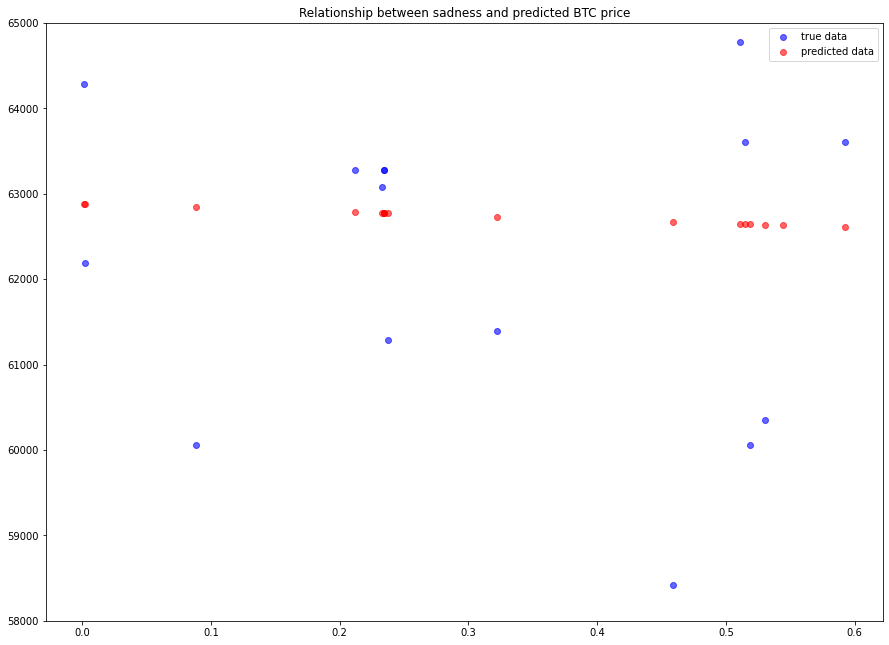

In [ ]:
# for btc, do a regression between price and sadness
from sklearn.linear_model import LinearRegression
import pylab
import matplotlib.pyplot as plt 
lr = LinearRegression()

X = df_btc_senti_price[["sadness"]]
Y= df_btc_senti_price["Price"]

lr.fit(X, Y)

Y_predicted = lr.predict(X)  # make predictions

print(f'The coefficient for sadness is {lr.coef_}.')

plt.figure(figsize=(15,11))
plt.scatter(X, Y, color = 'b', label = 'true data', alpha = 0.6, )
plt.scatter(X, Y_predicted, color='red', label = 'predicted data' , alpha = 0.6)
plt.legend()
plt.title("Relationship between sadness and predicted BTC price")
#plt.yscale("log")
plt.ylim(58000, 65000)
plt.show()


In [ ]:
import numpy as np

# Calculate mse
print(f'The mean standard error is {np.mean((Y - Y_predicted)**2)}.')

The mean standard error is 5026040.010917594.


In [ ]:
# We originally want to do regressions between the price and each of the emotion.
# But it would be good if we can do a multiple regression between different emotions and the price of BTC.

# regression for multivariables for BTC
X_multi = df_btc_senti_price[["anger" , "disgust" , "fear" , "joy" , "sadness"]]
#X_multi = pd.concat([df_btc_senti_price[["anger"]],
#                     df_btc_senti_price["disgust"],
#                     df_btc_senti_price["fear"],
#                     df_btc_senti_price["joy"],
#                     df_btc_senti_price["sadness"]], axis =1)

Y= df_btc_senti_price['Price']

lr.fit(X_multi, Y)

Y_predicted = lr.predict(X_multi)  # make predictions

print(f'The coefficients for different emotions are {lr.coef_}.')

# Therefore, we are able to find the impact of each emotion on the price of BTC.
# We find that disgust has the most negative impact on the price with a coefficient of -1082.
# We find that joy has the most positive impact on the price with a coefficient of 837.


The coefficients for different emotions are [ -421.7122546  20822.12513515   497.97843288   435.18629736
 -2982.78684759].


In [ ]:
# the second cryptocurrency ETHUSDT

df_eth_senti = df_eth.sort_values(by="Date published")
df_eth_senti
df_eth_price = searchBinance(['ETHUSDT'], startTime='2021-10-20 00:00:00', endTime='2021-12-18 00:00:00', interval='1d')
df_eth_price

dict_eth_senti_price = {'Date':[], 'Price':[], 'anger':[], 'disgust':[], 'fear':[],	'joy':[],	'sadness':[]}

for i in range(len(df_eth_senti['Date published'])):

  date = df_eth_senti['Date published'][i][:-10]
  dict_eth_senti_price["Date"].append(date)

  df_price_row = df_eth_price[df_eth_price['Open time'] == date]
  df_price_row_dict = df_price_row.to_dict()
  price_index = list(df_price_row_dict['Open'].keys())[0]
  price = df_price_row['Open'][price_index]
  dict_eth_senti_price["Price"].append(price)

  dict_eth_senti_price["anger"].append(df_eth_senti['anger'][i])
  dict_eth_senti_price["disgust"].append(df_eth_senti['disgust'][i])
  dict_eth_senti_price["fear"].append(df_eth_senti['fear'][i])
  dict_eth_senti_price["joy"].append(df_eth_senti['joy'][i])
  dict_eth_senti_price["sadness"].append(df_eth_senti['sadness'][i])

df_eth_senti_price = pd.DataFrame.from_dict(dict_eth_senti_price).sort_values(by='Date')
print(df_eth_senti_price)

df_eth_senti_price["Price"] = pd.to_numeric(df_eth_senti_price["Price"])
df_eth_senti_price["anger"] = pd.to_numeric(df_eth_senti_price["anger"])
df_eth_senti_price["disgust"] = pd.to_numeric(df_eth_senti_price["disgust"])
df_eth_senti_price["fear"] = pd.to_numeric(df_eth_senti_price["fear"])
df_eth_senti_price["joy"] = pd.to_numeric(df_eth_senti_price["joy"])
df_eth_senti_price["sadness"] = pd.to_numeric(df_eth_senti_price["sadness"])


          Date          Price     anger   disgust      fear       joy   sadness
17  2021-10-21  4161.37000000  0.109735  0.070333  0.109214  0.249781  0.543262
16  2021-10-25  4082.33000000  0.110461  0.055100  0.033972  0.050359  0.406997
9   2021-10-25  4082.33000000  0.101638  0.101183  0.075813  0.256691  0.546074
5   2021-10-26  4220.36000000  0.101331  0.047988  0.523290  0.615143  0.168922
13  2021-10-27  4131.52000000  0.071213  0.054676  0.016353  0.570584  0.458559
1   2021-10-29  4286.01000000  0.155521  0.038323  0.089924  0.533131  0.462914
14  2021-11-03  4589.68000000  0.040163  0.003707  0.000214  0.559831  0.015713
3   2021-11-03  4589.68000000  0.111811  0.096079  0.069832  0.616744  0.503888
12  2021-11-03  4589.68000000  0.040163  0.003707  0.000214  0.559831  0.015713
11  2021-11-03  4589.68000000  0.128976  0.118943  0.090631  0.486664  0.581192
8   2021-11-08  4612.59000000  0.078596  0.036556  0.105237  0.598647  0.149919
15  2021-11-10  4732.33000000  0.129348 

The coefficient for sadness is [778.1654124].


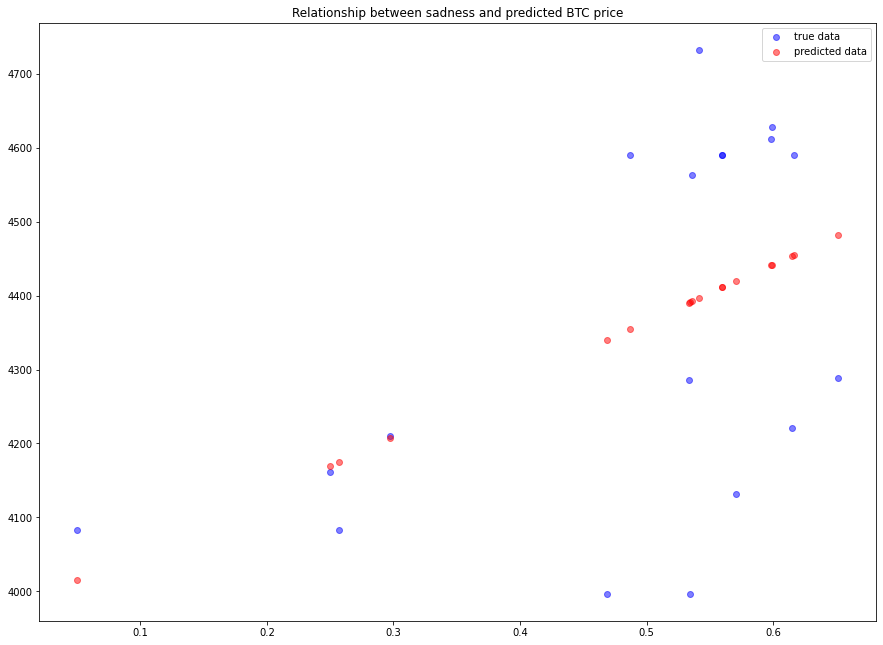

In [ ]:
# for Eth, do a regression between price and joy in terms of Eth
from sklearn.linear_model import LinearRegression
import pylab
import matplotlib.pyplot as plt 
lr = LinearRegression()

X = df_eth_senti_price[["joy"]]
Y= df_eth_senti_price["Price"]

lr.fit(X, Y)

Y_predicted = lr.predict(X)  # make predictions

print(f'The coefficient for sadness is {lr.coef_}.')

plt.figure(figsize=(15,11))
plt.scatter(X, Y, color = 'blue', label = 'true data', alpha = 0.5, )
plt.scatter(X, Y_predicted, color='red', label = 'predicted data' , alpha = 0.5)
plt.legend()
plt.title("Relationship between sadness and predicted BTC price")
#plt.yscale("log")
#plt.ylim(0, 1000)
plt.show()


In [ ]:
# We want to do a multiple regression between different emotions and the price of Eth.

# regression for multivariables
#X_multi = df_eth_senti_price["anger" and "disgust" and "fear" and "joy" and "sadness"]
X_multi = pd.concat([df_eth_senti_price[["anger"]],
                     df_eth_senti_price[["disgust"]],
                     df_eth_senti_price[["fear"]],
                     df_eth_senti_price[["joy"]],
                     df_eth_senti_price[["sadness"]]], axis =1)

Y= df_eth_senti_price["Price"]

lr.fit(X_multi, Y)

Y_predicted = lr.predict(X_multi)  # make predictions

print(f'The coefficients for different emotions are {lr.coef_}.')

# Therefore, we are able to find the impact of each emotion on the price of ETH.
# We find that disgust has the most negative impact on the price with a coefficient of -1082.
# We find that joy has the most positive impact on the price with a coefficient of 837.

The coefficients for different emotions are [  -12.63881884 -1057.92800267  -599.85162078   850.81163988
    24.07161331].


In [ ]:
# The third cryptocurrency SHIBUSDT

df_shib_senti = df_shib.sort_values(by="Date published")
df_shib_price = searchBinance(['SHIBUSDT'], startTime='2021-10-20 00:00:00', endTime='2021-12-18 00:00:00', interval='1d')

dict_shib_senti_price = {'Date':[], 'Price':[], 'anger':[], 'disgust':[], 'fear':[],	'joy':[],	'sadness':[]}

for i in range(len(df_shib_senti['Date published'])):

  date = df_shib_senti['Date published'][i][:-10]
  dict_shib_senti_price["Date"].append(date)

  df_price_row = df_shib_price[df_shib_price['Open time'] == date]
  df_price_row_dict = df_price_row.to_dict()
  price_index = list(df_price_row_dict['Open'].keys())[0]
  price = df_price_row['Open'][price_index]
  dict_shib_senti_price["Price"].append(price)

  dict_shib_senti_price["anger"].append(df_shib_senti['anger'][i])
  dict_shib_senti_price["disgust"].append(df_shib_senti['disgust'][i])
  dict_shib_senti_price["fear"].append(df_shib_senti['fear'][i])
  dict_shib_senti_price["joy"].append(df_shib_senti['joy'][i])
  dict_shib_senti_price["sadness"].append(df_shib_senti['sadness'][i])

df_shib_senti_price = pd.DataFrame.from_dict(dict_shib_senti_price).sort_values(by='Date')
print(df_shib_senti_price)

df_shib_senti_price["Price"] = pd.to_numeric(df_shib_senti_price["Price"])
df_shib_senti_price["anger"] = pd.to_numeric(df_shib_senti_price["anger"])
df_shib_senti_price["disgust"] = pd.to_numeric(df_shib_senti_price["disgust"])
df_shib_senti_price["fear"] = pd.to_numeric(df_shib_senti_price["fear"])
df_shib_senti_price["joy"] = pd.to_numeric(df_shib_senti_price["joy"])
df_shib_senti_price["sadness"] = pd.to_numeric(df_shib_senti_price["sadness"])

          Date       Price     anger   disgust      fear       joy   sadness
5   2021-10-26  0.00004229  0.086011  0.083709  0.056410  0.588195  0.192622
1   2021-10-27  0.00004797  0.066279  0.007148  0.038863  0.257765  0.374659
10  2021-10-27  0.00004797  0.094766  0.060816  0.109542  0.595433  0.617647
8   2021-10-28  0.00007906  0.141211  0.153406  0.108075  0.261857  0.208656
2   2021-10-28  0.00007906  0.092385  0.134712  0.044079  0.461666  0.206362
4   2021-10-28  0.00007906  0.175386  0.046791  0.081105  0.650753  0.160304
7   2021-10-28  0.00007906  0.161940  0.087963  0.134029  0.641886  0.174232
13  2021-10-29  0.00006886  0.133052  0.049841  0.098674  0.538708  0.535306
12  2021-10-29  0.00006886  0.072417  0.007352  0.002096  0.855630  0.072309
3   2021-11-02  0.00007150  0.104545  0.097897  0.030931  0.163662  0.555716
14  2021-11-02  0.00007150  0.185568  0.056183  0.209922  0.021590  0.787731
0   2021-11-04  0.00005546  0.065156  0.010988  0.085201  0.182600  0.530261

The coefficient for sadness is [-1.29049541e-05].


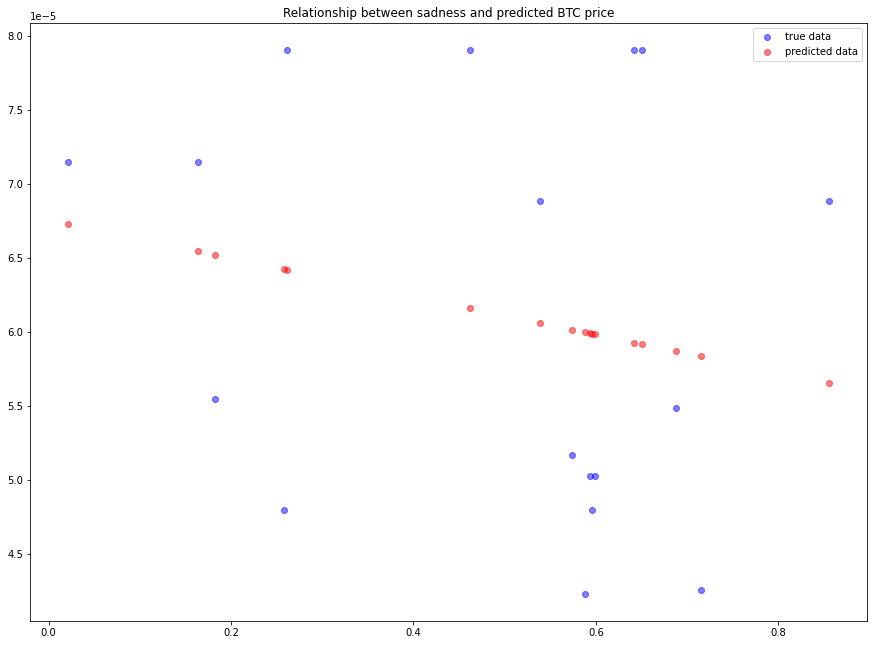

In [ ]:
# for SHIBUSDT, do a regression between Price and joy in terms of SHIBUSDT

from sklearn.linear_model import LinearRegression
import pylab
import matplotlib.pyplot as plt 
lr = LinearRegression()

X = df_shib_senti_price[["joy"]]
Y= df_shib_senti_price["Price"]

lr.fit(X, Y)

Y_predicted = lr.predict(X)  # make predictions

print(f'The coefficient for sadness is {lr.coef_}.')

plt.figure(figsize=(15,11))
plt.scatter(X, Y, color = 'blue', label = 'true data', alpha = 0.5, )
plt.scatter(X, Y_predicted, color='red', label = 'predicted data' , alpha = 0.5)
plt.legend()
plt.title("Relationship between sadness and predicted BTC price")
#plt.yscale("log")
#plt.ylim(0, 1000)
plt.show()

# There is a negative correlation between the joy and price in terms of SHIBUSDT

In [ ]:
# regression for multivariables for SHIBUSDT
X_multi = df_shib_senti_price[["anger" , "disgust" , "fear" , "joy" , "sadness"]]

Y= df_shib_senti_price['Price']

lr.fit(X_multi, Y)

Y_predicted = lr.predict(X_multi)  # make predictions

print(f'The coefficients for different emotions are {lr.coef_}.')

# Therefore, we are able to find the impact of each emotion on the price of SHIBUSDT.
# We find that anger has the most positive impact on the price with a coefficient of 2.3e-04.
# We find that sadness has the most negative impact on the price with a coefficient of -3.3e-05.


The coefficients for different emotions are [ 2.39604001e-04  3.00250891e-05 -1.33538674e-05 -1.63531860e-05
 -2.65133065e-05].


In [ ]:
# The fourth cryptocurrency DOGEUSDT

df_doge_senti = df_doge.sort_values(by="Date published")
df_doge_price = searchBinance(['DOGEUSDT'], startTime='2021-10-20 00:00:00', endTime='2021-12-18 00:00:00', interval='1d')

dict_doge_senti_price = {'Date':[], 'Price':[], 'anger':[], 'disgust':[], 'fear':[],	'joy':[],	'sadness':[]}

for i in range(len(df_doge_senti['Date published'])):

  date = df_doge_senti['Date published'][i][:-10]
  dict_doge_senti_price["Date"].append(date)

  df_price_row = df_doge_price[df_doge_price['Open time'] == date]
  df_price_row_dict = df_price_row.to_dict()
  price_index = list(df_price_row_dict['Open'].keys())[0]
  price = df_price_row['Open'][price_index]
  dict_doge_senti_price["Price"].append(price)

  dict_doge_senti_price["anger"].append(df_doge_senti['anger'][i])
  dict_doge_senti_price["disgust"].append(df_doge_senti['disgust'][i])
  dict_doge_senti_price["fear"].append(df_doge_senti['fear'][i])
  dict_doge_senti_price["joy"].append(df_doge_senti['joy'][i])
  dict_doge_senti_price["sadness"].append(df_doge_senti['sadness'][i])

df_doge_senti_price = pd.DataFrame.from_dict(dict_doge_senti_price).sort_values(by='Date')
print(df_doge_senti_price)

df_doge_senti_price["Price"] = pd.to_numeric(df_doge_senti_price["Price"])
df_doge_senti_price["anger"] = pd.to_numeric(df_doge_senti_price["anger"])
df_doge_senti_price["disgust"] = pd.to_numeric(df_doge_senti_price["disgust"])
df_doge_senti_price["fear"] = pd.to_numeric(df_doge_senti_price["fear"])
df_doge_senti_price["joy"] = pd.to_numeric(df_doge_senti_price["joy"])
df_doge_senti_price["sadness"] = pd.to_numeric(df_doge_senti_price["sadness"])

          Date       Price     anger   disgust      fear       joy   sadness
10  2021-10-21  0.25480000  0.057397  0.057455  0.038961  0.542446  0.454168
7   2021-10-25  0.27570000  0.622933  0.079171  0.007174  0.239462  0.160426
3   2021-10-27  0.25580000  0.066279  0.007148  0.038863  0.257765  0.374659
1   2021-10-28  0.23790000  0.092385  0.134712  0.044079  0.461666  0.206362
12  2021-10-29  0.29970000  0.099815  0.027504  0.036525  0.623566  0.134976
5   2021-11-04  0.26890000  0.065156  0.010988  0.085201  0.182600  0.530261
9   2021-11-08  0.26640000  0.217797  0.181272  0.072777  0.189074  0.248965
4   2021-11-10  0.27370000  0.027964  0.004054  0.001572  0.955219  0.013819
11  2021-11-13  0.25940000  0.170184  0.132127  0.109382  0.474155  0.540345
8   2021-11-14  0.26120000  0.214386  0.139406  0.104063  0.584476  0.286560
0   2021-11-16  0.25670000  0.090354  0.190799  0.090144  0.327829  0.169620
2   2021-11-17  0.23640000  0.041398  0.010043  0.006005  0.039778  0.090409

The coefficient for sadness is [-1.29049541e-05].


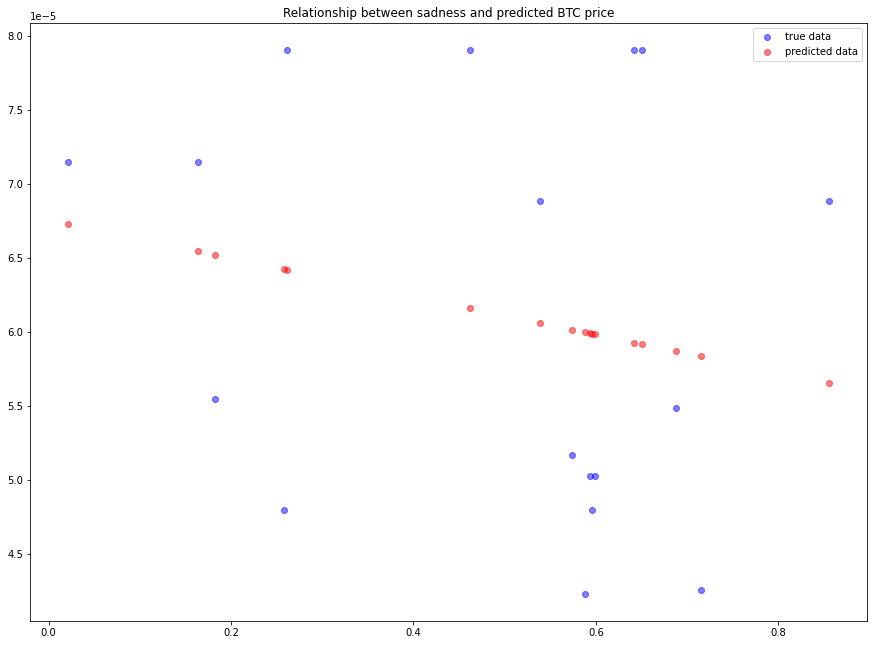

In [ ]:
# for DOGEUSDT, do a regression between price and joy in terms of DOGEUSDT

from sklearn.linear_model import LinearRegression
import pylab
import matplotlib.pyplot as plt 
lr = LinearRegression()

X = df_shib_senti_price[["joy"]]
Y= df_shib_senti_price["Price"]

lr.fit(X, Y)

Y_predicted = lr.predict(X)  # make predictions

print(f'The coefficient for sadness is {lr.coef_}.')

plt.figure(figsize=(15,11))
plt.scatter(X, Y, color = 'blue', label = 'true data', alpha = 0.5, )
plt.scatter(X, Y_predicted, color='red', label = 'predicted data' , alpha = 0.5)
plt.legend()
plt.title("Relationship between sadness and predicted BTC price")
#plt.yscale("log")
#plt.ylim(0, 1000)
plt.show()

# There is a negative correlation between the joy and price in terms of DOGEUSDT

In [ ]:
# regression for multivariables for DOGEUSDT
X_multi = df_doge_senti_price[["anger" , "disgust" , "fear" , "joy" , "sadness"]]

Y= df_doge_senti_price['Price']

lr.fit(X_multi, Y)

Y_predicted = lr.predict(X_multi)  # make predictions

print(f'The coefficients for different emotions are {lr.coef_}.')

# Therefore, we are able to find the impact of each emotion on the price of SHIBUSDT.
# We find that anger has the most positive impact on the price with a coefficient of 0.04100956.
# We find that disgust has the most negative impact on the price with a coefficient of -0.06470663.



The coefficients for different emotions are [ 0.04099577 -0.02891223 -0.06312224  0.03347929 -0.01417479].
